# Vaccine Sentiment Spectrum: Identifying Risks and Themes for Informed Public Health Action
#### By Rebekah McLaughlin

<p align="center">
  <img src = https://content.presspage.com/uploads/2110/1920_potsvaccination.jpeg?10000>
</p> 

## Overview

### Public Health Problem
The decision-making process behind individuals opting for or against vaccination can be very nuanced. However, the discourse surrounding the COVID-19 vaccines has remained polarized since their development, initial rollout, and up to the present day. 

While some individuals may have received the vaccine due to job requirements, for many, their decision hinged on **personal sentiments** towards vaccination.

Despite COVID-19 no longer being as acute a crisis in 2024 as it was during 2020-2021, it remains a leading cause of death in the United States and numerous other countries. Therefore, it is an ongoing priorety to protect those most vulnerable to the disease. As a major part of this effort, achieving herd immunity via individuals getting vaccinated is a continued top priority.

### Data-Driven Solution Effort

#### **The Dataset**

The [dataset](https://https://www.kaggle.com/datasets/gpreda/all-covid19-vaccines-tweets) is a collection of 228,207 rows, each containing a raw tweet's text, tweet ID, username, and other pertinent details. Every tweet in this dataset pertains to the COVID-19 vaccines. The tweets and associated information were collected by searching Twitter using the names of all the different COVID-19 vaccines. Then the dataset was subsequently donated to Kaggle in 2022.

#### **The Goal**

I will use this dataset to perform sentiment analysis on this collection of tweets. This will involve building several classification models. The model that demonstrates the highest accuracy in identifying the correct sentiment will be selected for deployment. The model will act as a tool to monitor changes in public sentiment towards the vaccine. My hope is that this tool will also facilitate public health initiatives aimed at continually encouraging vaccination against COVID-19.

##### **Importing libraries and loading data**

The first step is importing the necessary libraries and analysis tools. Next, I will load the dataset into a pandas dataframe.

In [87]:
import pandas as pd
import numpy as np

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import ConfusionMatrixDisplay,RocCurveDisplay,roc_auc_score, classification_report

import nltk
from nltk import WordNetLemmatizer # lemmatizer using WordNet
from nltk.corpus import wordnet, words, stopwords
from nltk import pos_tag # nltk's native part of speech tagging
from nltk.tokenize import word_tokenize

import re
import emoji
import random
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from wordcloud import WordCloud
from spellchecker import SpellChecker
from nltk.probability import FreqDist
from skopt import BayesSearchCV

In [88]:
df = pd.read_csv('./Data/vaccination_all_tweets 3.csv')
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228202,1460170772299665408,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 09:00:15,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228203,1460163268262051841,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:26,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False
228204,1460163224221851655,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228205,1460156376995573765,Gatti Valentino🐾,Southern Africa,"Entrepreneur, self taught cook🍲🌮 @Chelsea @Fer...",2019-08-28 10:31:43,8103,3113,45726,False,2021-11-15 08:03:03,They promote their Vaccines leaving out the st...,['SputnikV'],Twitter for Android,0,0,False


# I. Data Preparation

## 1. Initial Data Assessment

I'll take a quick  look at the details of the dataframe, inspect for missing values and extent of missing-ness.

Then I'll look at random, specific tweets via the `'text'` column to get an idea of what type of cleaning will be necessary.

In [89]:
df.isna().sum()

id                      0
user_name               2
user_location       66911
user_description    17023
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            49703
source                119
retweets                0
favorites               0
is_retweet              0
dtype: int64

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228207 entries, 0 to 228206
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                228207 non-null  int64 
 1   user_name         228205 non-null  object
 2   user_location     161296 non-null  object
 3   user_description  211184 non-null  object
 4   user_created      228207 non-null  object
 5   user_followers    228207 non-null  int64 
 6   user_friends      228207 non-null  int64 
 7   user_favourites   228207 non-null  int64 
 8   user_verified     228207 non-null  bool  
 9   date              228207 non-null  object
 10  text              228207 non-null  object
 11  hashtags          178504 non-null  object
 12  source            228088 non-null  object
 13  retweets          228207 non-null  int64 
 14  favorites         228207 non-null  int64 
 15  is_retweet        228207 non-null  bool  
dtypes: bool(2), int64(6), object(8)
memory

In [91]:
df

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
228202,1460170772299665408,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 09:00:15,45+ #URBAN #Bengaluru #CovidVaccine Availabili...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228203,1460163268262051841,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:26,18-44 #BBMP #Bengaluru #CovidVaccine Availabil...,"['BBMP', 'Bengaluru', 'CovidVaccine', 'COVISHI...",VaxBlr,0,1,False
228204,1460163224221851655,VaxBLR,"Bengaluru, India",Hourly updates on FREE and PAID 18+ and 45+ va...,2021-06-21 08:44:34,31,0,0,False,2021-11-15 08:30:15,18-44 #URBAN #Bengaluru #CovidVaccine Availabi...,"['URBAN', 'Bengaluru', 'CovidVaccine', 'COVISH...",VaxBlr,0,0,False
228205,1460156376995573765,Gatti Valentino🐾,Southern Africa,"Entrepreneur, self taught cook🍲🌮 @Chelsea @Fer...",2019-08-28 10:31:43,8103,3113,45726,False,2021-11-15 08:03:03,They promote their Vaccines leaving out the st...,['SputnikV'],Twitter for Android,0,0,False


In [92]:
# Drop rows with NaN or None values in the 'text' column
df.dropna(subset=['text'], inplace=True)

# Drop duplicates from the DataFrame
df.drop_duplicates(inplace=True)

In [93]:
df['text'][18]

'.@Pfizer will rake in billions from its expensive #CovidVaccine but @AlbertBourla refuses to cut the price for lowe… https://t.co/eC94w3TUl0'

#### **Initial Impressions**

There is a fair amount of missing data in the `'user_location'`, `'user_descriptions'`, and `'hashtage'` columns. Fortunately, there are no missing values in the `'text'` feature, which is the primary focus of my analysis and potentially the only feature I'll be working with.

## 2. Text Cleaning and Preprocessing

Twitter text requires thorough cleaning, given the unique challenges of dealing with emojis, slang, URLs, usernames, and hashtags.

I'll start by cleaning all of the tweet text, followed by tokenization, stopword removal, and lemmatization of the text.

In [95]:
def cleaner(tweet):
    if tweet:  # Check if tweet is not empty
        tweet = re.sub(r'\d+', '', tweet)  # Remove numbers
        tweet = re.sub(r'[^\w\s]', '', tweet)  # Remove punctuation and special characters
        tweet = re.sub(r'\bcovid[-\s]?19\b', 'covid', tweet)  # Replace variations of 'covid-19' with 'covid'
        tweet = " ".join(tweet.split())  # Remove extra whitespaces
        tweet = tweet.lower()  # Convert to lowercase
        tweet = re.sub("@[A-Za-z0-9]+", "", tweet)  # Remove @ sign
        tweet = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", tweet)
        tweet = " ".join(tweet.split())
        tweet = emoji.demojize(tweet)  # Remove emojis
        tweet = tweet.replace("#", "").replace("_", " ")
        tweet = re.sub(r'\d+', '', tweet)  # Remove numbers
        tweet = re.sub(r'[^\w\s]', '', tweet)  # Remove punctuation and special characters
        tweet = re.sub(r'\bcovid[-\s]?19\b', 'covid', tweet)  # Replace variations of 'covid-19' with 'covid'
        tweet = " ".join(tweet.split())  # Remove extra whitespaces
        return tweet
    else:
        return ''  # Return empty string in case of empty tweets

df['cleaned_text'] = df['text'].map(lambda x: cleaner(x))

In [96]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words]

# Add column for tokenized text without stopwords
df['tokenized_text'] = df['cleaned_text'].apply(lambda x: word_tokenize(x))
df['tokenized_text'] = df['tokenized_text'].apply(lambda x: remove_stopwords(x))

In [97]:
# Making a new dataframe without irrelevant tweet information
irrelevant_columns = ['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'] 
df_cleaned = df.drop(columns=irrelevant_columns)

In [98]:
# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to perform lemmatization on a list of tokens
def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(token) for token in tokens]

# Apply lemmatization to tokenized text column
df_cleaned['lemmatized_text'] = df_cleaned['tokenized_text'].apply(lambda x: lemmatize_tokens(x))

## 3. Corpus Word Distribution Visualization

With all the text pre-processed (excluding vectorization, which must occur after the train-test split due to the dataset's size), I'll now examine the most common words in the corpus.

To gain insight into the most frequently used words in this Twitter dataset, I'll create a plot showing the distribution of these words. I'll also generate a word cloud.

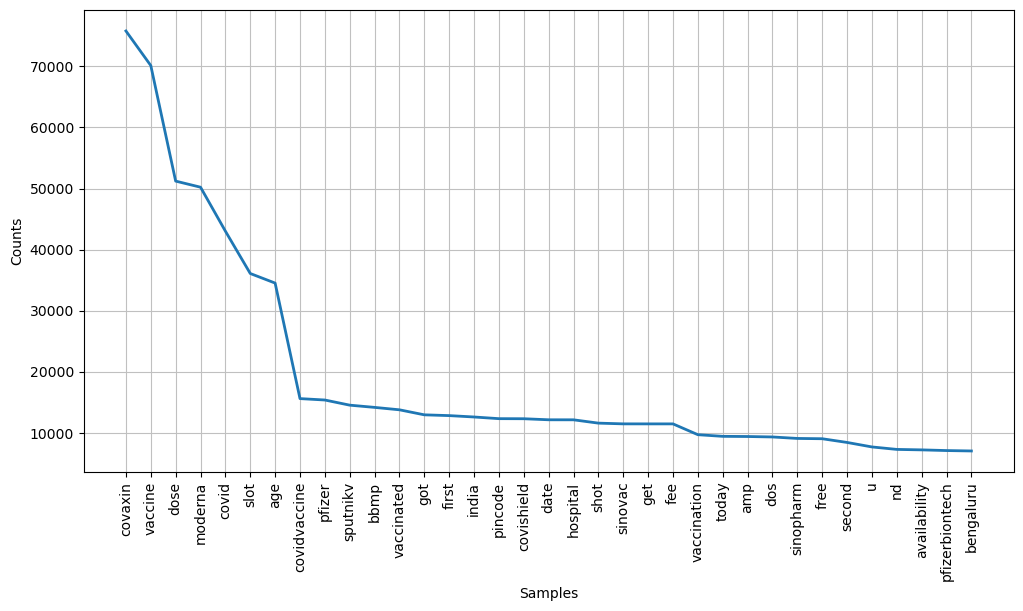

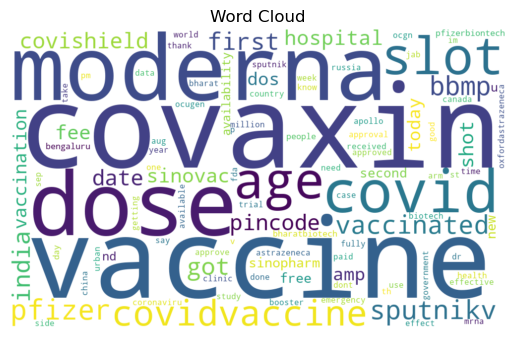

In [99]:
# Word Distribution Plot
all_words = [word for sublist in df_cleaned['lemmatized_text'] for word in sublist]
freq_dist = FreqDist(all_words)
plt.figure(figsize=(12, 6))
freq_dist.plot(35, cumulative=False)

# Word Cloud
wordcloud = WordCloud(width=1000, height=600, background_color='white', max_words=100, colormap='viridis', collocations=False).generate(' '.join(all_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud')
plt.show()

## 4. Assigning Sentiment

Given unlimited time and resources, I'd like to manually label the sentiment of each tweet. However, due to time constraints, this option isn't possible. 

Instead, I'll use extensive lists of positive and negative words to assign a score to each word (-1 for negative, 1 for positive, and 0 for neutral). I will then add these scores together for each tweet to determine its `'sentiment_score.'` If the score is positive, I'll label the tweet as "Positive"; if negative, as "Negative"; and if 0, as "Neutral."

Finally, I'll print a report displaying the original text, cleaned text, and assigned `'sentiment'` for a sample of data points. This will allow me to assess the appropriateness of sentiment assignments by comparing them to the original text.

In [100]:
# Load positive and negative word lists
positive_words = set(open('./Data/positive-words.txt', 'r').read().splitlines())
negative_words = set(open('./Data/negative-words.txt', 'r').read().splitlines())

# Function to calculate sentiment score for each tweet
def calculate_sentiment(tokens):
    num_positive = sum(1 for word in tokens if word in positive_words)
    num_negative = sum(1 for word in tokens if word in negative_words)
    return num_positive - num_negative

# Add column for sentiment scores
df_cleaned['sentiment_score'] = df_cleaned['lemmatized_text'].apply(lambda x: calculate_sentiment(x))

# Assign sentiment labels
df_cleaned['sentiment'] = df_cleaned['sentiment_score'].apply(lambda score: 'Positive' if score > 0 else ('Negative' if score < 0 else 'Neutral'))

In [101]:
df_cleaned['sentiment'].value_counts(normalize=True)

sentiment
Neutral     0.574145
Positive    0.267639
Negative    0.158216
Name: proportion, dtype: float64

In [102]:
# Randomly select 20 rows
random_rows = df_cleaned.sample(n=30, random_state=42)

# Print out the desired columns for selected rows
for index, row in random_rows.iterrows():
    print("Text: ", row['text'])
    print("Processed Text: ", row['tokenized_text'])
    print("Sentiment Score: ", row['sentiment_score'])
    print("Sentiment: ", row['sentiment'])
    print("\n")

Text:  I didn't expect the #Moderna vaccine to knock me on my ass.

I'm so fucking sleepy lol
Processed Text:  ['didnt', 'expect', 'moderna', 'vaccine', 'knock', 'ass', 'im', 'fucking', 'sleepy', 'lol']
Sentiment Score:  -2
Sentiment:  Negative


Text:  Hon’ble PM @narendramodi We are all watching how you are making “Make in India” strong.  You are strengthening the… https://t.co/jeSkPMng4Y
Processed Text:  ['honble', 'pm', 'narendramodi', 'watching', 'making', 'make', 'india', 'strong', 'strengthening', 'httpstcojeskpmngy']
Sentiment Score:  1
Sentiment:  Positive


Text:  An 89-year-old man died just days after receiving #Sinopharm vaccine. The vaccinated man was in good health and had… https://t.co/kJnQ8EJXuo
Processed Text:  ['yearold', 'man', 'died', 'days', 'receiving', 'sinopharm', 'vaccine', 'vaccinated', 'man', 'good', 'health', 'httpstcokjnqejxuo']
Sentiment Score:  0
Sentiment:  Neutral


Text:  #SputnikV

Dr Reddy’s stock on🔥
Processed Text:  ['sputnikv', 'dr', 'reddys', 's

#### **Sentiment Label Inspection Results**

After looking at a small sample of tweets and comparing them to their labeled sentiment, it appears that my method for classifying each tweet was appropriate.

## 5. Word Distribution by Sentiment

Now that each tweet has been labeled with a sentiment, I'll create some visualizations to explore the word distribution by sentiment. I'll use frequency plots and word clouds for this analysis.

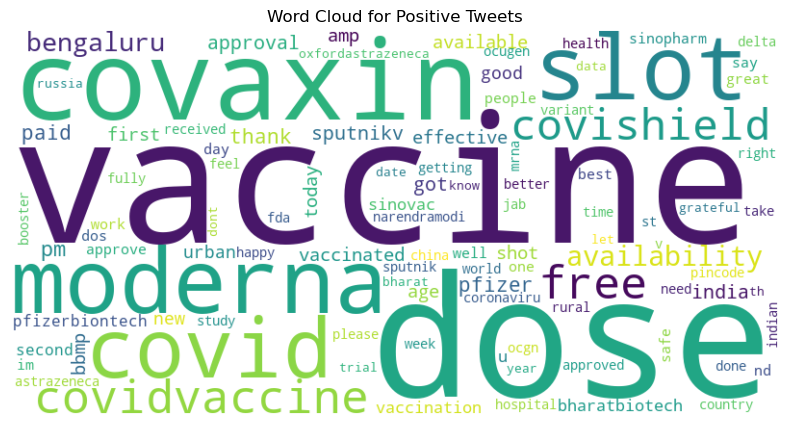

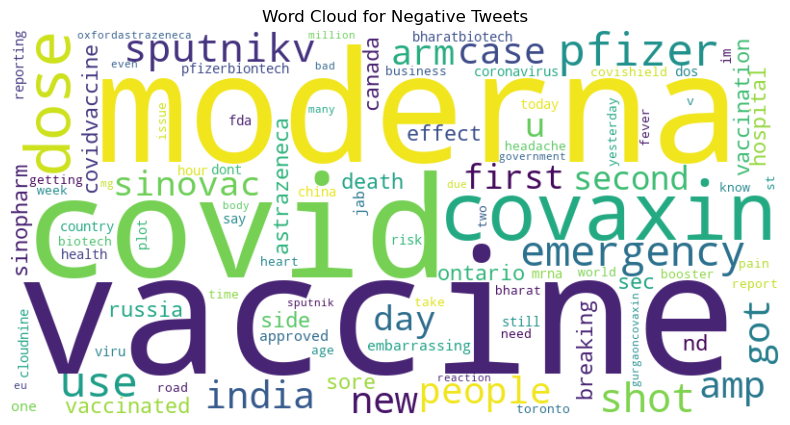

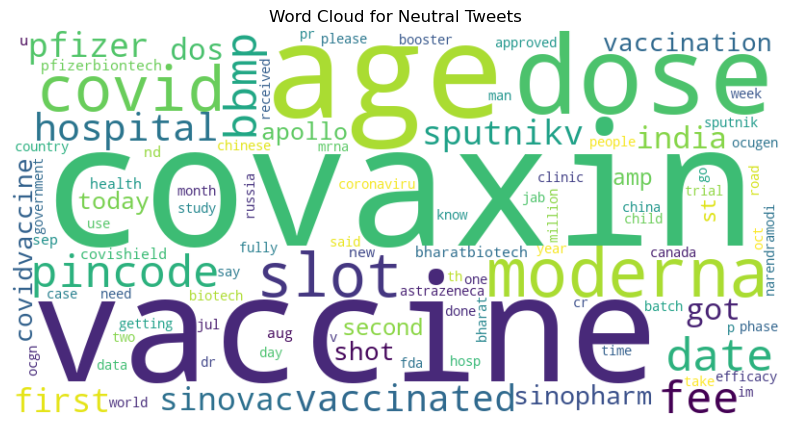

Top 30 Most Common Words in Positive Tweets


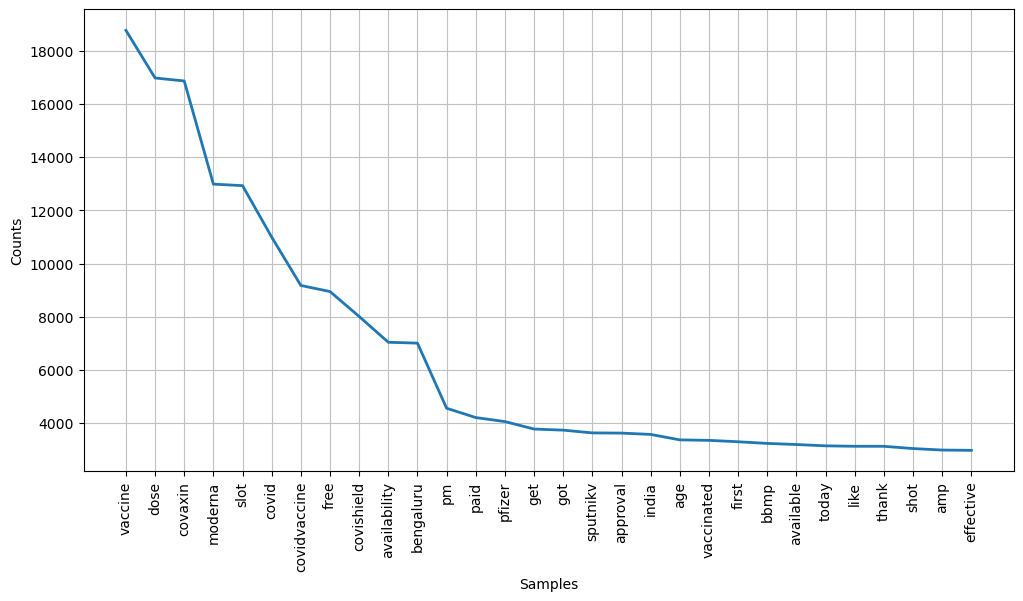





Top 30 Most Common Words in Negative Tweets


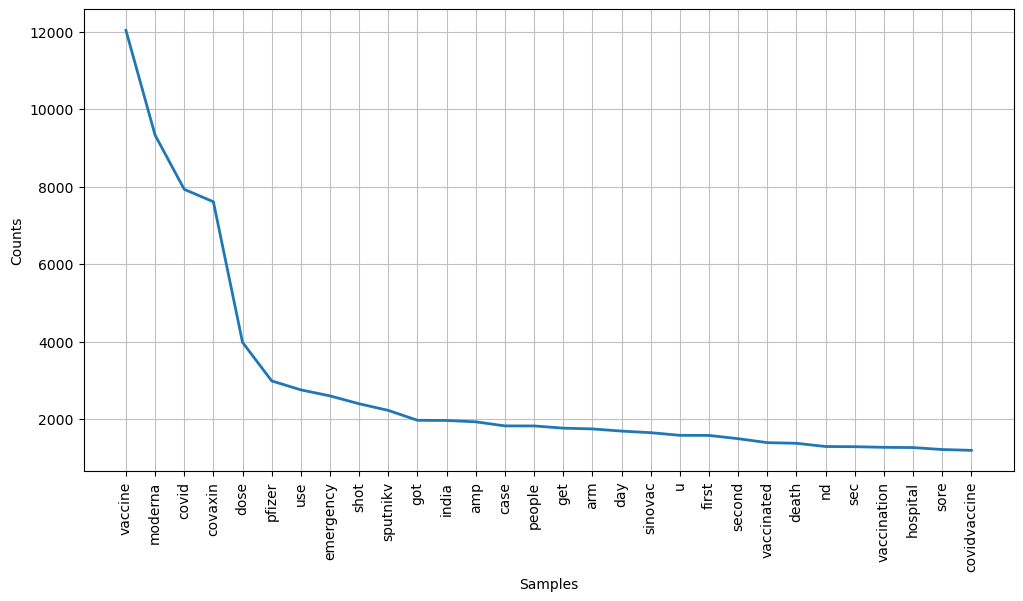





Top 30 Most Common Words in Neutral Tweets


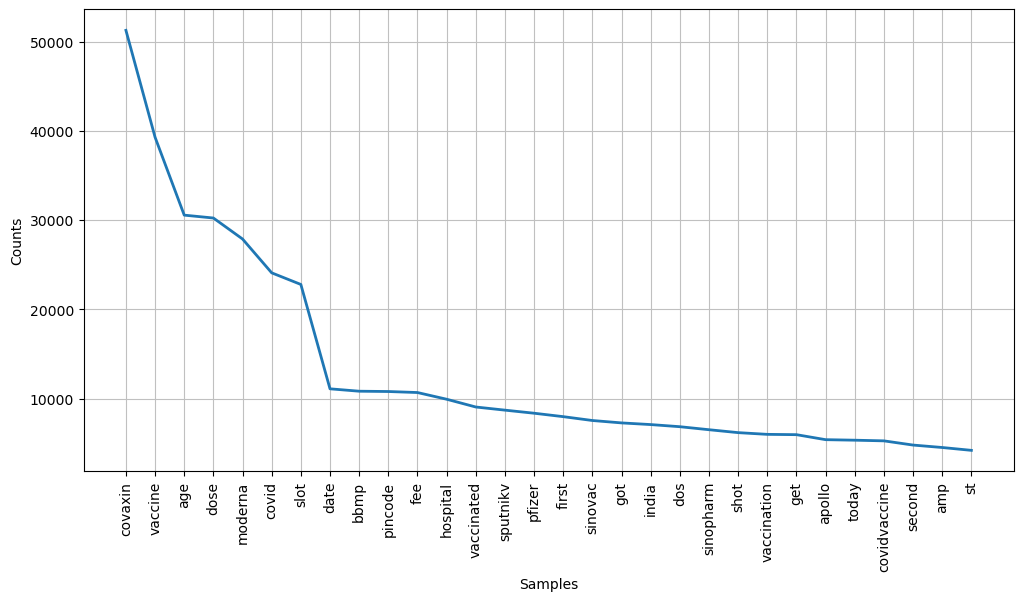

In [103]:
# Function to generate word cloud for a given sentiment
def generate_wordcloud(sentiment):
    sentiment_tweets = df_cleaned[df_cleaned['sentiment'] == sentiment]
    all_words = [word for sublist in sentiment_tweets['lemmatized_text'] for word in sublist]
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, colormap='viridis', collocations=False).generate(' '.join(all_words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Word Cloud for ' + sentiment + ' Tweets')
    plt.axis('off')
    plt.show()

# Function to plot word distribution for a given sentiment
def plot_word_distribution(sentiment):
    sentiment_tweets = df_cleaned[df_cleaned['sentiment'] == sentiment]
    all_words = [word for sublist in sentiment_tweets['lemmatized_text'] for word in sublist]
    freq_dist = FreqDist(all_words)
    plt.figure(figsize=(12, 6))
    freq_dist.plot(30, cumulative=False)

# Generate word clouds for each sentiment
generate_wordcloud('Positive')
generate_wordcloud('Negative')
generate_wordcloud('Neutral')

# Plot word distribution for each sentiment
print('''Top 30 Most Common Words in Positive Tweets''')
plot_word_distribution('Positive')
print("\n")
print("\n")
print('''Top 30 Most Common Words in Negative Tweets''')
plot_word_distribution('Negative')
print("\n")
print("\n")
print('''Top 30 Most Common Words in Neutral Tweets''')
plot_word_distribution('Neutral')

# II. Modeling

## 1. Splitting the Data

With over 200,000 datapoints, I decided to split the data into a train set of 75%, a test set of 15%, and then a validate set of 10%.

After splitting the data, I'll then vectorize `'X_train'`, `'X_test'`, and `'X_val'` using Term Frequency-Inverse Document Frequency (TF-IDF). Since all of the tweets mention the vaccine and often refer to Covid-19, the logic behind using this vectorization method is that it will hopefully give less value to the common subject matter of the text and more value to the sentiment words within the text.

In [104]:
# Join the lemmatized tokens into strings
df_cleaned['lemmatized_text'] = df_cleaned['lemmatized_text'].apply(lambda x: ' '.join(x))

# Assign the TF-IDF matrix to X
X = df_cleaned['lemmatized_text']

# Assign original sentiment labels to y
y = df_cleaned['sentiment']

In [22]:
# Perform train-test split
X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Calculate the size of the validation set based on the size of the entire dataset X
valsize = 0.1 / 0.85 # 10% of the whole dataset

# Further split the remaining data into validation and train sets
X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=valsize, random_state=42)

In [23]:
# Initialize the TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit the vectorizer on the training corpus
X_train = tfidf_vectorizer.fit_transform(X_train)

# Transform the validate corpus using the fitted vectorizer
X_val = tfidf_vectorizer.transform(X_val)

# Transform the test corpus using the fitted vectorizer
X_test = tfidf_vectorizer.transform(X_test)

## 2. Logistic Regression Model

For my baseline model, I'll use logistic regression without adjusting any hyperparameters. The primary metric I'll focus on is accuracy, as it's most important for me to correctly classify as many tweets as possible.

In [24]:
# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = log_reg.predict(X_val)

# Evaluate the model
print("Validation Set:")
print(classification_report(y_val, y_val_pred))

Validation Set:
              precision    recall  f1-score   support

    Negative       0.91      0.79      0.85      3701
     Neutral       0.91      0.95      0.93     12903
    Positive       0.93      0.92      0.93      6217

    accuracy                           0.92     22821
   macro avg       0.92      0.89      0.90     22821
weighted avg       0.92      0.92      0.91     22821



#### **Initial Logistic Regression Scores**

Without adjusting anything about the model, most of my scores are in the 80's or higher! These results seem promising for my initial model. 

However, I'd like to see if I can further improve the model's performance. I'll use GridSearchCV to search for the best hyperparameters for my data.

In [25]:
# Define the hyperparameters grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Regularization strength
    'penalty': ['l2'],  # Only 'l2' penalty is compatible with 'lbfgs' solver
    'solver': ['lbfgs', 'liblinear']  # Available solvers
}

# Initialize logistic regression model
log_reg = LogisticRegression(max_iter=1000)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_val_pred = best_model.predict(X_val)

# Evaluate the best model
print("Validation Set:")
print(classification_report(y_val, y_val_pred))

Best Hyperparameters: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
Validation Set:
              precision    recall  f1-score   support

    Negative       0.94      0.91      0.93      3701
     Neutral       0.96      0.97      0.96     12903
    Positive       0.96      0.97      0.96      6217

    accuracy                           0.96     22821
   macro avg       0.95      0.95      0.95     22821
weighted avg       0.96      0.96      0.96     22821



In [26]:
# Make predictions on the test set using the best model
y_test_pred = best_model.predict(X_test)

# Evaluate the best model
print("Test Set:")
print(classification_report(y_test, y_test_pred))

Test Set:
              precision    recall  f1-score   support

    Negative       0.94      0.92      0.93      5359
     Neutral       0.97      0.96      0.97     19727
    Positive       0.95      0.97      0.96      9146

    accuracy                           0.96     34232
   macro avg       0.95      0.95      0.95     34232
weighted avg       0.96      0.96      0.96     34232



#### **Best Logistic Regression Model Analysis**

After hyperparameter tuning, my logistic regression model achieved an accuracy score of 0.96, with scores of 0.92 or higher across all metrics.

In the confusion matrix below, it's clear that the misclassified tweets, only 4% of the total, are primarily distributed among the following categories:

- Predicted 'Neutral' but actually Positive
- Predicted 'Positive' but actually Neutral
- Predicted 'Neutral' but actually Negative
- Predicted 'Negative' but actually Neutral

The model performed much better at distinguishing between 'Positive' and 'Negative' sentiments, with only 34 of the test tweets misclassified as either 'Negative' or 'Positive' when it was actually the other.

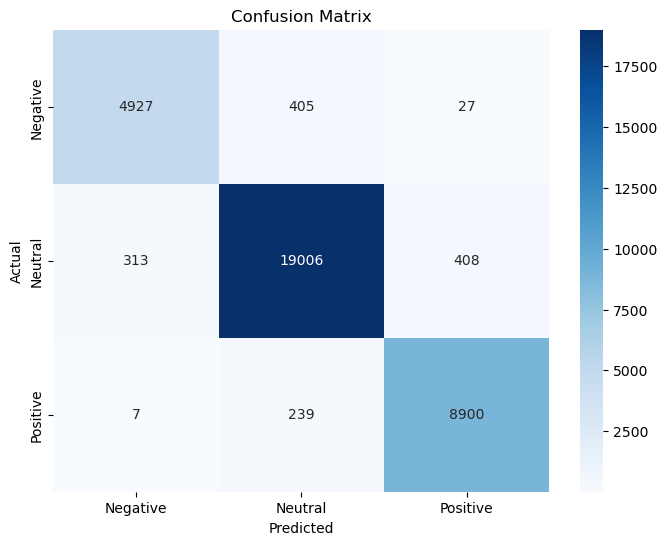

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 3. Multinomial Naive Bayes Model

The next model I'll try is a model that has been known to perform well with sentiment analysis tasks: Naive Bayes.

In [30]:
from sklearn.naive_bayes import MultinomialNB

# Initialize Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Train the model
nb_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = nb_model.predict(X_val)

# Evaluate the model
print("Validation Set:")
print(classification_report(y_val, y_val_pred))

Validation Set:
              precision    recall  f1-score   support

    Negative       0.97      0.21      0.34      3701
     Neutral       0.66      0.99      0.79     12903
    Positive       0.97      0.39      0.56      6217

    accuracy                           0.70     22821
   macro avg       0.86      0.53      0.56     22821
weighted avg       0.79      0.70      0.65     22821



In [31]:
# Define the hyperparameters grid
param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10, 100]  
}

# Initialize Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=nb_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_val_pred = best_model.predict(X_val)

# Evaluate the best model
print("Validation Set:")
print(classification_report(y_val, y_val_pred))

Best Hyperparameters: {'alpha': 0.1}
Validation Set:
              precision    recall  f1-score   support

    Negative       0.81      0.59      0.68      3701
     Neutral       0.78      0.91      0.84     12903
    Positive       0.83      0.69      0.75      6217

    accuracy                           0.79     22821
   macro avg       0.81      0.73      0.76     22821
weighted avg       0.80      0.79      0.79     22821



In [38]:
from skopt import BayesSearchCV
import warnings

# set up the hyperparameters search space
param_space = {
    'alpha': (0.001, 1, 100)  # Smoothing parameter
}

# Initialize Multinomial Naive Bayes model
nb_model = MultinomialNB()

# Suppress warning messages
warnings.filterwarnings('ignore', category=UserWarning)

# Initialize BayesSearchCV
bayes_search = BayesSearchCV(
    estimator=nb_model,
    search_spaces=param_space,
    n_iter=50,  # Number of parameter settings that are sampled
    cv=5,  # Number of cross-validation folds
    scoring='accuracy',  # Scoring metric
    n_jobs=-1  # Number of jobs to run in parallel (-1 means using all processors)
)

# Perform Bayesian optimization to find the best hyperparameters
bayes_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = bayes_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = bayes_search.best_estimator_

# Make predictions on the validation set using the best model
y_val_pred = best_model.predict(X_val)

# Evaluate the best model
print("Validation Set:")
print(classification_report(y_val, y_val_pred))

Best Hyperparameters: OrderedDict([('alpha', 0.001)])
Validation Set:
              precision    recall  f1-score   support

    Negative       0.73      0.65      0.69      3701
     Neutral       0.80      0.86      0.83     12903
    Positive       0.79      0.72      0.75      6217

    accuracy                           0.79     22821
   macro avg       0.78      0.74      0.76     22821
weighted avg       0.79      0.79      0.79     22821



In [39]:
# Make predictions on the validation set using the best model
y_test_pred = best_model.predict(X_test)

# Evaluate the best model
print("Test Set:")
print(classification_report(y_test, y_test_pred))

Test Set:
              precision    recall  f1-score   support

    Negative       0.70      0.65      0.67      5359
     Neutral       0.81      0.86      0.83     19727
    Positive       0.79      0.72      0.75      9146

    accuracy                           0.79     34232
   macro avg       0.77      0.74      0.75     34232
weighted avg       0.79      0.79      0.79     34232



#### **Naive Bayes Hyperparametric Tuned Model Analysis**

After hyperparameter tuning, the Naive Bayes model did not perform as well as the Logistic Regression model. The maximum accuracy achieved by Naive Bayes was 0.79. This model performed significantly worse at misclassifying tweets as either 'Positive' or 'Negative'.

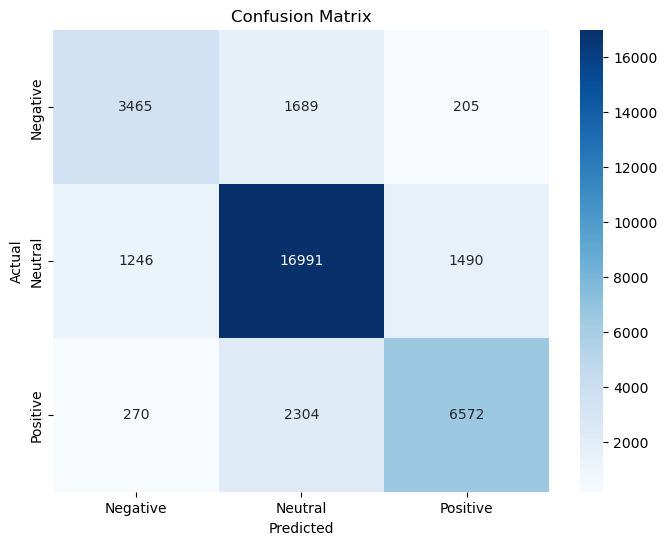

In [40]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 4. Random Forest Classifier

The third model I'll experiment with is a Random Forest. While my best-performing model so far has been the straightforward Logistic Regression, I'm interested in exploring whether an ensemble model can acheive even better results.

In [49]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = rf_model.predict(X_val)

# Evaluate the model
print("Validation Set:")
print(classification_report(y_val, y_val_pred))

Validation Set:
              precision    recall  f1-score   support

    Negative       0.92      0.67      0.77      3701
     Neutral       0.86      0.95      0.90     12903
    Positive       0.92      0.85      0.88      6217

    accuracy                           0.88     22821
   macro avg       0.90      0.82      0.85     22821
weighted avg       0.88      0.88      0.88     22821



In [50]:
# set up the hyperparameters grid
param_grid = {
    'n_estimators': [50, 100, 150],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search to find the best hyperparameters
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_val_pred = best_model.predict(X_val)

# Evaluate the best model
print("Validation Set:")
print(classification_report(y_val, y_val_pred))

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 150}
Validation Set:
              precision    recall  f1-score   support

    Negative       0.92      0.67      0.78      3701
     Neutral       0.86      0.95      0.90     12903
    Positive       0.91      0.86      0.89      6217

    accuracy                           0.88     22821
   macro avg       0.90      0.83      0.86     22821
weighted avg       0.88      0.88      0.88     22821



In [51]:
# Make predictions on the validation set using the best model
y_test_pred = best_model.predict(X_test)

# Evaluate the best model
print("Test Set:")
print(classification_report(y_test, y_test_pred))

Test Set:
              precision    recall  f1-score   support

    Negative       0.91      0.68      0.77      5359
     Neutral       0.87      0.95      0.91     19727
    Positive       0.90      0.87      0.88      9146

    accuracy                           0.88     34232
   macro avg       0.89      0.83      0.85     34232
weighted avg       0.88      0.88      0.88     34232



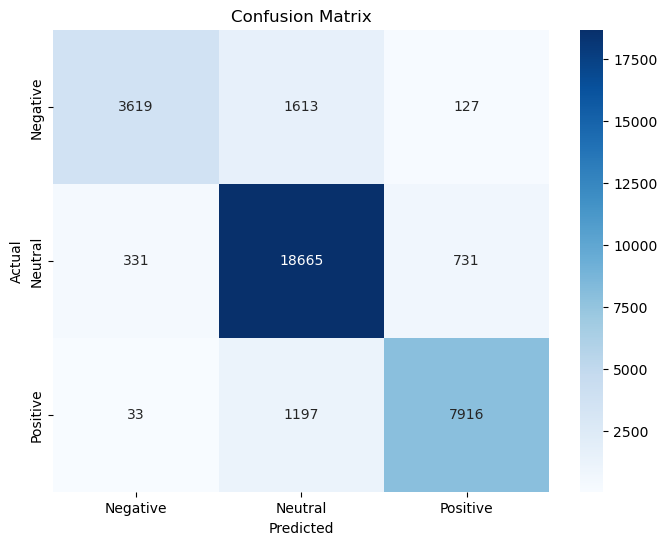

In [52]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## 5. Support Vector Machine

Finally, I'll assess the performance of a Support Vector Machine (SVM) in classifying the sentiment of the tweets.

In [43]:
from sklearn.svm import SVC

# Define the SVM model
svm_model = SVC()

# Train the SVM model
svm_model.fit(X_train, y_train)

# Make predictions on the validation set
y_val_pred = svm_model.predict(X_val)

# Evaluate the model
print("Validation Set:")
print(classification_report(y_val, y_val_pred))

Validation Set:
              precision    recall  f1-score   support

    Negative       0.95      0.84      0.89      3701
     Neutral       0.93      0.96      0.94     12903
    Positive       0.94      0.94      0.94      6217

    accuracy                           0.93     22821
   macro avg       0.94      0.91      0.92     22821
weighted avg       0.94      0.93      0.93     22821



In [45]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10],              # Regularization parameter
    'kernel': ['linear', 'rbf'],    # Kernel function
    'gamma': ['scale', 'auto'],     # Gamma for RBF kernel
}

# Initialize SVM model
svm_model = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Perform grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_val)

# Evaluate the best model
print("Test Set:")
print(classification_report(y_val, y_pred))

Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Test Set:
              precision    recall  f1-score   support

    Negative       0.98      0.97      0.97      3701
     Neutral       0.98      0.99      0.99     12903
    Positive       0.98      0.99      0.98      6217

    accuracy                           0.98     22821
   macro avg       0.98      0.98      0.98     22821
weighted avg       0.98      0.98      0.98     22821



In [46]:
# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the best model
print("Test Set:")
print(classification_report(y_test, y_pred))

Test Set:
              precision    recall  f1-score   support

    Negative       0.97      0.97      0.97      5359
     Neutral       0.99      0.98      0.99     19727
    Positive       0.98      0.99      0.98      9146

    accuracy                           0.98     34232
   macro avg       0.98      0.98      0.98     34232
weighted avg       0.98      0.98      0.98     34232



#### **SVM Evaluation**

The hyperparametric tuned SVM model performed the best at classifying the sentiment of the tweets, with an accuracy score of 0.98. 

Across the board, all metrics are 0.97 or higher!

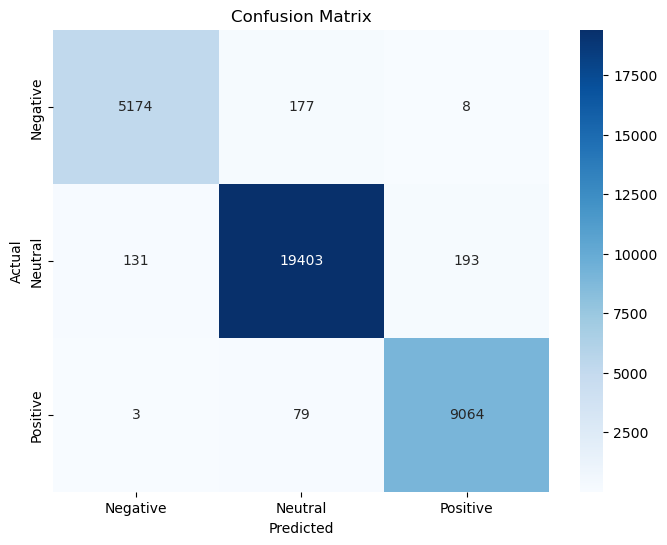

In [47]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", 
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# III. Results and App Deployment

## 1. Modeling Results

**Support Vector Machine** emerges as the best model, achieving an accuracy score of 0.98!

It's worth noting that there are alternative ways I could have chosen to pre-process the twitter text, particularly the way I treated 'Neutral' tweets. In sentiment analysis projects, data professionals often exclude neutral tweets to simplify the task for models. However, I made a deliberate choice not to do so, and there are two main reasons behind this decision:

1. A significant portion of the dataset was made up of neutral tweets, accounting for over half of the data. By excluding them, I would have disregarded a substantial amount of valuable data.

2. Many 'Neutral' tweets originated from news sources. Given Twitter's role as an information dissemination platform, this trend is likely to continue in the future. Therefore, keeping them seemed like they would help the model generalize better.

I also did not attempt to balance the target and chose to instead see how models would handle the imbalanced target. However, most of the models I used still managed to perform well at classifying 'Positive', 'Negative', and 'Neutral.'

Last assessments of model results:
- Logistic Regression, the initial model I employed, emerged as the runner-up with an accuracy score of 0.96.
- Naive Bayes performed the poorest in classifying all sentiments of tweets.
- I anticipated Random Forest to perform better, given its status as an ensemble method known for handling class imbalance well. However, it struggled to differentiate between neutral and negative sentiments and neutral and positive sentiments.

## 2. Deployment

Below is the code for deploying the model for local app use.

In [121]:
# Load trained, best model
model = SVC(C=10, gamma='scale', kernel='linear')

# Fit the model to training data
model.fit(X_train, y_train)

# Save only the model
joblib.dump(model, 'sentiment_model.pkl')

# In your Streamlit app, load the model separately
model = joblib.load('sentiment_model.pkl')